In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

In [3]:
train = train.dropna()
test = test.dropna()

In [5]:
train.shape

(24000, 2)

In [6]:
test.shape

(6000, 2)

In [7]:
X_train_corpus = []
for words in train['x']:
    sentence = ""
    for word in words.split(","):
        sentence += word + " "
    sentence = sentence[:len(sentence)-1]

    X_train_corpus.append(sentence)

In [8]:
X_test_corpus = []
for words in test['x']:
    sentence = ""
    for word in words.split(","):
        sentence += word + " "
    sentence = sentence[:len(sentence)-1]

    X_test_corpus.append(sentence)

In [9]:
X_train_corpus[:5]

['퍼플 구입하다 마음 들다',
 '색상 가격대비 넘 마음 들다 쓸꺼 같다',
 '촉촉하다 좋다 립밤',
 '색깔 예쁘다 좋다',
 '색상 디자인 맘 들다 주위 이쁘다 그러다']

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [11]:
X_train_vectors = tfidf_vectorizer.fit_transform(X_train_corpus)
X_test_vectors = tfidf_vectorizer.transform(X_test_corpus)

In [12]:
print(X_train_vectors.shape)
print(X_test_vectors.shape)

(24000, 16070)
(6000, 16070)


In [13]:
X_train_df = pd.DataFrame(X_train_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names())
X_test_df = pd.DataFrame(X_test_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names())
y_train_df = pd.DataFrame(train['y'].values, columns=['target'])
y_test_df = pd.DataFrame(test['y'].values, columns=['target'])

In [14]:
target_names = list(set(train['y']))
target_mapping_table = {}
for idx, names in enumerate(target_names):
    target_mapping_table[names] = idx

In [15]:
X_train_df.head()

,___,_______,가거,가게,가겠지,가겨,가겨고,가격,가격값,가격굿,...,힘들거,힘들다,힘들더리구요요,힘들지,힘듦,힘듬,힘을,힘이,힘주다,힝하얘
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y_train_df['target'] = y_train_df['target'].map(target_mapping_table)
y_test_df['target'] = y_test_df['target'].map(target_mapping_table)

In [17]:
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_test_df, y_test_df], axis=1)

In [18]:
X_train_vectors.toarray().shape

(24000, 16070)

In [19]:
X_test_vectors.toarray().shape

(6000, 16070)

In [20]:
train_df.head()

,___,_______,가거,가게,가겠지,가겨,가겨고,가격,가격값,가격굿,...,힘들다,힘들더리구요요,힘들지,힘듦,힘듬,힘을,힘이,힘주다,힝하얘,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
test_df.head()

,___,_______,가거,가게,가겠지,가겨,가겨고,가격,가격값,가격굿,...,힘들다,힘들더리구요요,힘들지,힘듦,힘듬,힘을,힘이,힘주다,힝하얘,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24766,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [29]:
from sklearn.decomposition import PCA

# PCA 모델을 생성
pca = PCA(n_components=2) # 주성분 갯수
pca_train_result = pca.fit_transform(X_train_vectors.toarray()) # PCA 적용

In [30]:
pca_train_df = pd.DataFrame(pca_train_result, columns=['r0', 'r1'])
pca_train_df = pd.concat([pca_train_df, y_train_df], axis=1)

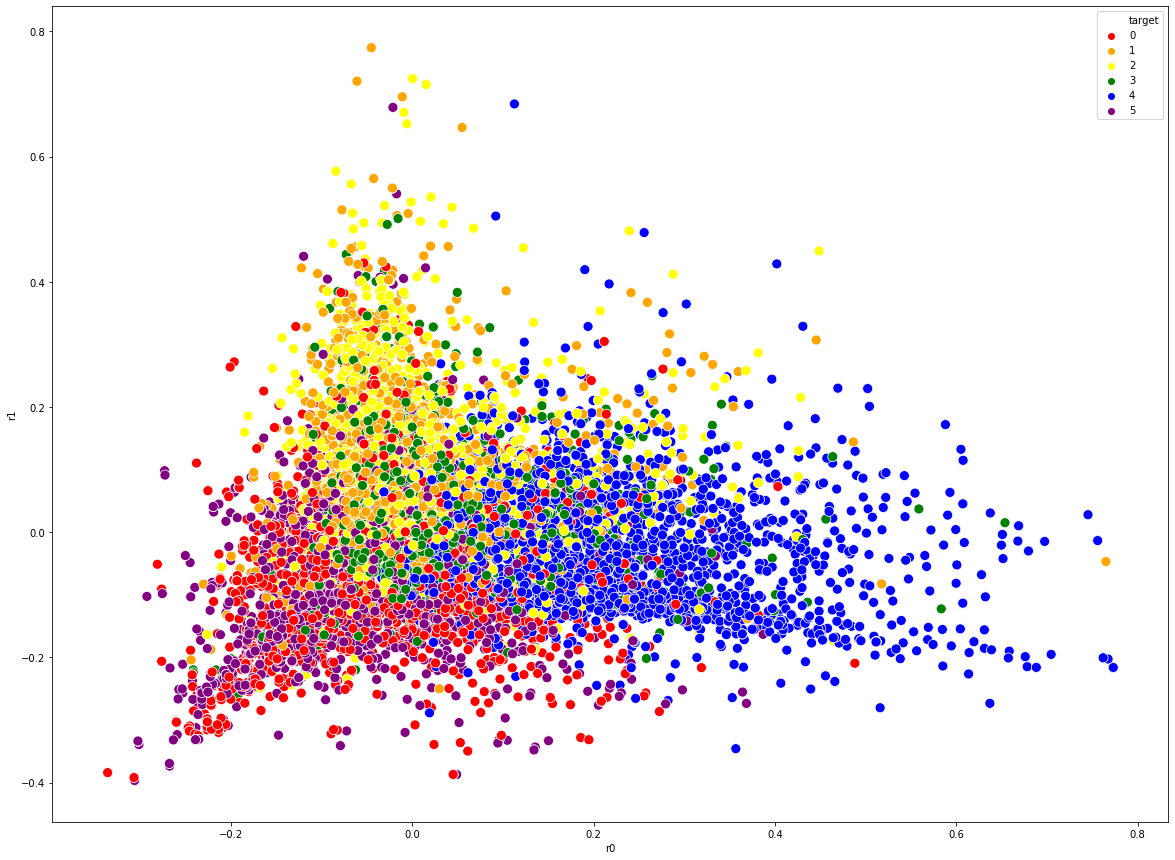

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.scatterplot(x='r0',
                y='r1',
                hue='target',
                s=100,
                palette=['red','orange','yellow','green','blue','purple'],
                data=pca_train_df)

plt.show()

In [32]:
# 테스트 시각화
pca_test_result = pca.transform(X_test_vectors.toarray()) # PCA 적용

In [33]:
pca_test_df = pd.DataFrame(pca_test_result, columns=['r0', 'r1'])
pca_test_df = pd.concat([pca_test_df, y_test_df], axis=1)

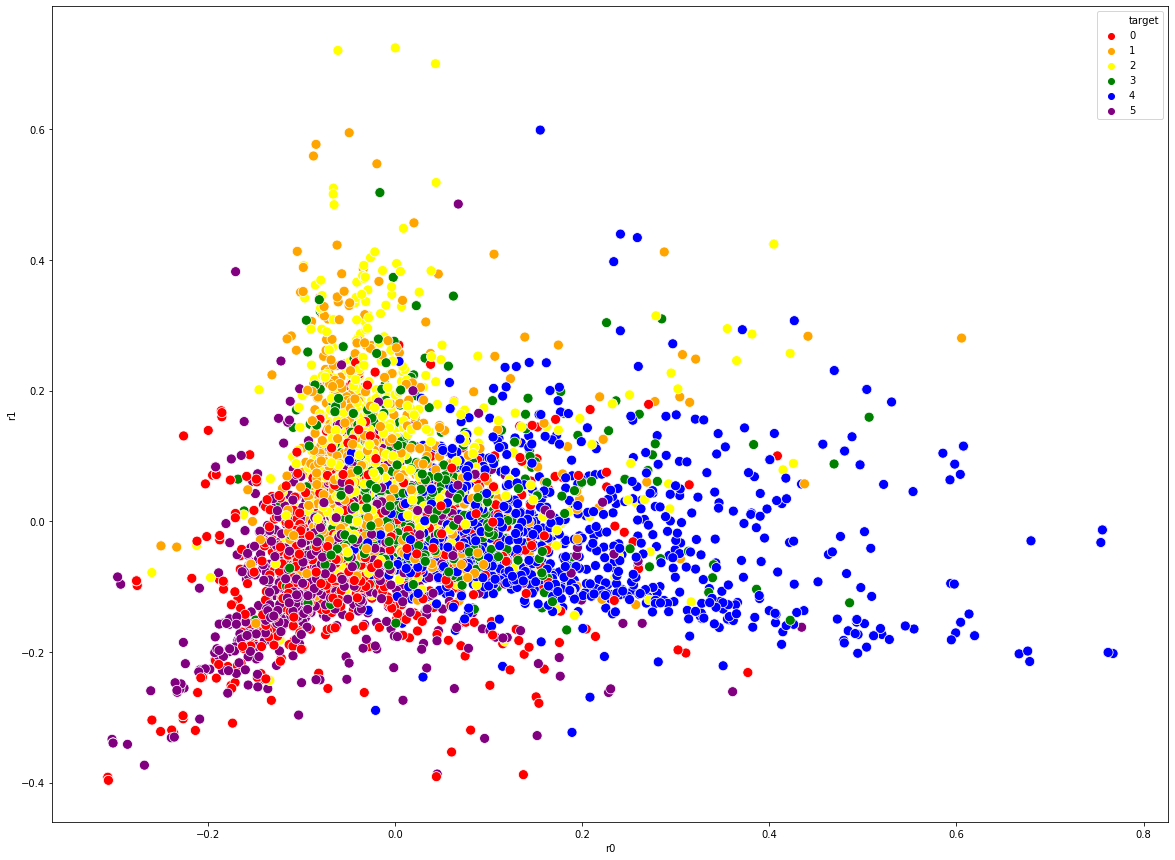

In [34]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='r0',
                y='r1',
                hue='target',
                s=100,
                palette=['red','orange','yellow','green','blue','purple'],
                data=pca_test_df)

plt.show()